In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


In [2]:
dfgdp = pd.read_csv('gdp.csv')

In [3]:
list[dfgdp]

list[                    Country Name Code          1960          1961  \
0                          Aruba  ABW           NaN           NaN   
1    Africa Eastern and Southern  AFE  1.931311e+10  1.972349e+10   
2                    Afghanistan  AFG  5.377778e+08  5.488889e+08   
3     Africa Western and Central  AFW  1.040428e+10  1.112805e+10   
4                         Angola  AGO           NaN           NaN   
..                           ...  ...           ...           ...   
261                       Kosovo  XKX           NaN           NaN   
262                  Yemen, Rep.  YEM           NaN           NaN   
263                 South Africa  ZAF  7.575397e+09  7.972997e+09   
264                       Zambia  ZMB  7.130000e+08  6.962857e+08   
265                     Zimbabwe  ZWE  1.052990e+09  1.096647e+09   

             1962          1963          1964          1965          1966  \
0             NaN           NaN           NaN           NaN           NaN   
1    2.14939

In [4]:
columns_to_keep = ['Country Name', 'Code'] + [str(year) for year in range(2000, 2021)]
filtered_dfgdp = dfgdp[columns_to_keep]

# Save the filtered data to the current directory
output_file_path = 'filtered_dfgdp_2000_2020.csv' 
filtered_dfgdp.to_csv(output_file_path, index=False)


In [12]:
gdp = pd.read_csv('filtered_dfgdp_2000_2020.csv')
gdp

,Country Name,Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,1.873453e+09,1.920112e+09,1.941341e+09,2.021229e+09,2.228492e+09,2.330726e+09,2.424581e+09,2.615084e+09,...,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,2.839525e+11,2.588432e+11,2.648950e+11,3.526921e+11,4.388756e+11,5.122599e+11,5.759762e+11,6.612422e+11,...,9.433782e+11,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11
2,Afghanistan,AFG,NaN,NaN,4.055180e+09,4.515559e+09,5.226779e+09,6.209138e+09,6.971286e+09,9.747880e+09,...,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10
3,Africa Western and Central,AFW,1.404080e+11,1.480120e+11,1.769334e+11,2.046419e+11,2.540903e+11,3.105543e+11,3.932967e+11,4.617776e+11,...,6.709626e+11,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11
4,Angola,AGO,9.129635e+09,8.936064e+09,1.528559e+10,1.781271e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,...,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.341737e+09,6.163785e+09,6.735731e+09,7.074658e+09,6.295820e+09,6.682833e+09,7.180813e+09,7.878509e+09,7.899879e+09,7.716925e+09
262,"Yemen, Rep.",YEM,9.652436e+09,9.861560e+09,1.069463e+10,1.177797e+10,1.387279e+10,1.674634e+10,1.906198e+10,2.165053e+10,...,3.272642e+10,3.540134e+10,4.041524e+10,4.322859e+10,4.244510e+10,3.131737e+10,2.684013e+10,2.160614e+10,NaN,NaN
263,South Africa,ZAF,1.517534e+11,1.354296e+11,1.290881e+11,1.970202e+11,2.558066e+11,2.888685e+11,3.038609e+11,3.330755e+11,...,4.582015e+11,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.048421e+11,3.879346e+11,3.354421e+11
264,Zambia,ZMB,3.600683e+09,4.094481e+09,4.193846e+09,4.901840e+09,6.221078e+09,8.331870e+09,1.275686e+10,1.405696e+10,...,2.345952e+10,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10,1.811063e+10


In [14]:
country_list = gdp['Country Name']. tolist()
country_list

['Aruba',
 'Africa Eastern and Southern',
 'Afghanistan',
 'Africa Western and Central',
 'Angola',
 'Albania',
 'Andorra',
 'Arab World',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'American Samoa',
 'Antigua and Barbuda',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bahrain',
 'Bahamas, The',
 'Bosnia and Herzegovina',
 'Belarus',
 'Belize',
 'Bermuda',
 'Bolivia',
 'Brazil',
 'Barbados',
 'Brunei Darussalam',
 'Bhutan',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Central Europe and the Baltics',
 'Switzerland',
 'Channel Islands',
 'Chile',
 'China',
 "Cote d'Ivoire",
 'Cameroon',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Colombia',
 'Comoros',
 'Cabo Verde',
 'Costa Rica',
 'Caribbean small states',
 'Cuba',
 'Curacao',
 'Cayman Islands',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Djibouti',
 'Dominica',
 'Denmark',
 'Dominican Republic',
 'Algeria',
 'East Asia & Pacific (excluding high 

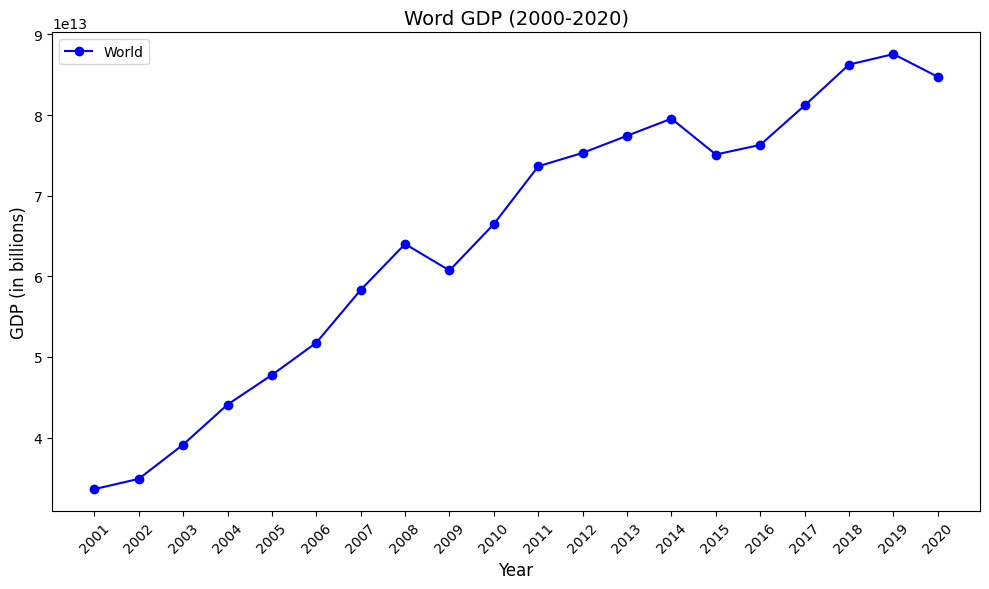

In [59]:
world = gdp[gdp['Country Name'] == 'World']

# Extract the years (2000-2020) and corresponding values
years = world.columns[3:]  # Skip the first three columns (Country Name, Code, and year labels)
values = world.iloc[0, 3:]  # Values for countries (ignoring Country Name and Code)



plt.figure(figsize=(10, 6))
plt.plot(years, values, marker='o', color='b', label='World')

plt.title('Word GDP (2000-2020)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in billions)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(False)

plt.legend()
plt.tight_layout()
plt.show()

In [32]:
oceania = [
    'American Samoa','Australia','Fiji','Kiribati','Marshall Islands','Micronesia, Fed. Sts.','Nauru',
    'New Caledonia','New Zealand','Palau','Papua New Guinea','Solomon Islands','Tonga','Tuvalu','Vanuatu','Samoa'
]

oceania


{'American Samoa',
 'Australia',
 'Fiji',
 'Kiribati',
 'Marshall Islands',
 'Micronesia, Fed. Sts.',
 'Nauru',
 'New Caledonia',
 'New Zealand',
 'Palau',
 'Papua New Guinea',
 'Samoa',
 'Solomon Islands',
 'Tonga',
 'Tuvalu',
 'Vanuatu'}

In [37]:
oceania_data = gdp[gdp['Country Name'].isin(oceania)]

In [45]:
print(oceania_data)

         Country Name Code          2000          2001          2002  \
172     New Caledonia  NCL  3.420032e+09  3.297735e+09  3.740057e+09   
180       New Zealand  NZL  5.262328e+10  5.387243e+10  6.662773e+10   
188             Palau  PLW  1.462975e+08  1.569079e+08  1.631849e+08   
189  Papua New Guinea  PNG  3.521340e+09  3.081024e+09  2.999511e+09   
209   Solomon Islands  SLB  4.199336e+08  4.094354e+08  3.464320e+08   
239             Tonga  TON  2.048496e+08  1.811170e+08  1.827637e+08   
245            Tuvalu  TUV  1.374206e+07  1.319654e+07  1.545099e+07   
258           Vanuatu  VUT  2.720147e+08  2.579269e+08  2.625966e+08   
260             Samoa  WSM  2.690197e+08  2.730884e+08  2.880789e+08   

             2003          2004          2005          2006          2007  \
172  4.915354e+09  5.895009e+09  6.238629e+09  6.979155e+09  8.819917e+09   
180  8.825089e+10  1.039052e+11  1.147201e+11  1.115388e+11  1.371889e+11   
188  1.539632e+08  1.651862e+08  1.904529e+08  1

In [49]:
#179 Naruru has many Nan data > need to be deleted

oceania_c = [
    'American Samoa','Australia','Fiji','Kiribati','Marshall Islands','Micronesia, Fed. Sts.',
    'New Caledonia','New Zealand','Palau','Papua New Guinea','Solomon Islands','Tonga','Tuvalu','Vanuatu','Samoa'
]

oceania_dc = gdp[gdp['Country Name'].isin(oceania_c)]

In [43]:
print(oceania_dc)

              Country Name Code          2000          2001          2002  \
11          American Samoa  ASM           NaN           NaN  5.120000e+08   
13               Australia  AUS  4.155762e+11  3.790839e+11  3.953427e+11   
76                    Fiji  FJI  1.678239e+09  1.652464e+09  1.833280e+09   
79   Micronesia, Fed. Sts.  FSM  2.332718e+08  2.409709e+08  2.425172e+08   
124               Kiribati  KIR  6.725417e+07  6.310127e+07  7.219646e+07   
155       Marshall Islands  MHL  1.153475e+08  1.228240e+08  1.317382e+08   
172          New Caledonia  NCL  3.420032e+09  3.297735e+09  3.740057e+09   
180            New Zealand  NZL  5.262328e+10  5.387243e+10  6.662773e+10   
188                  Palau  PLW  1.462975e+08  1.569079e+08  1.631849e+08   
189       Papua New Guinea  PNG  3.521340e+09  3.081024e+09  2.999511e+09   
209        Solomon Islands  SLB  4.199336e+08  4.094354e+08  3.464320e+08   
239                  Tonga  TON  2.048496e+08  1.811170e+08  1.827637e+08   

In [50]:
medians = {}

years = [str(year) for year in range(2000, 2021)]

for year in years:
    median_value = oceania_dc[year].median()
    medians[year] = median_value


for year, median in medians.items():
    print(f"Median GDP for {year}: {median}")

Median GDP for 2000: 270517201.689131
Median GDP for 2001: 265507619.442065
Median GDP for 2002: 288078881.433056
Median GDP for 2003: 338838639.378435
Median GDP for 2004: 397611126.698465
Median GDP for 2005: 465568018.300557
Median GDP for 2006: 493000000.0
Median GDP for 2007: 518000000.0
Median GDP for 2008: 590748237.021657
Median GDP for 2009: 592622502.360859
Median GDP for 2010: 663155954.963744
Median GDP for 2011: 737147951.052999
Median GDP for 2012: 747839697.746593
Median GDP for 2013: 758304466.245339
Median GDP for 2014: 756805940.214677
Median GDP for 2015: 730870581.672312
Median GDP for 2016: 780889605.899977
Median GDP for 2017: 832025573.983795
Median GDP for 2018: 821286927.535723
Median GDP for 2019: 852007112.724637
Median GDP for 2020: 758050410.3240659


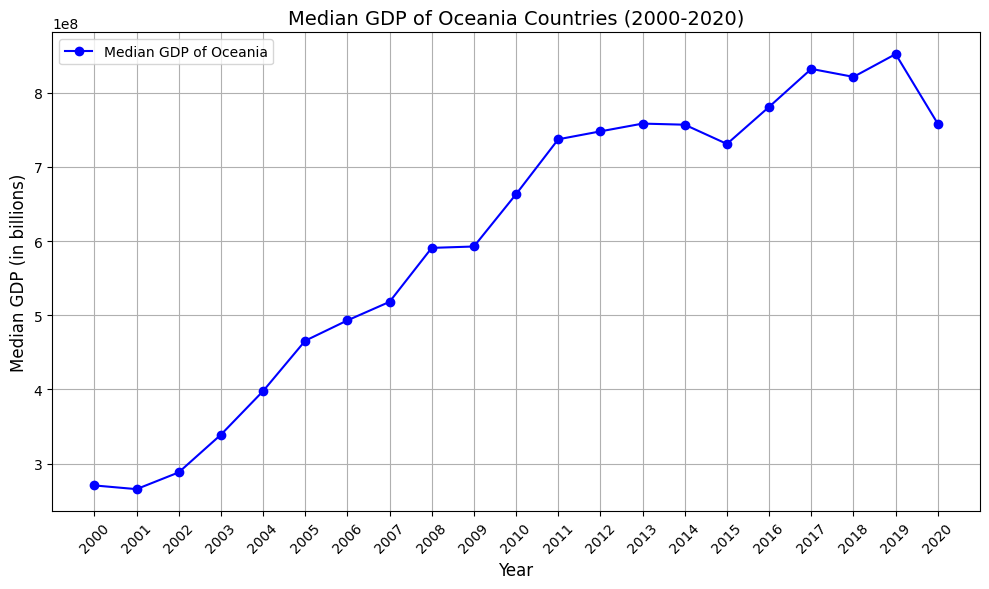

In [61]:
medians_df = pd.DataFrame(list(medians.items()), columns=['Year', 'Median GDP'])


plt.figure(figsize=(10, 6))
plt.plot(medians_df['Year'], medians_df['Median GDP'], marker='o', color='b', label='Median GDP of Oceania')


plt.title('Median GDP of Oceania Countries (2000-2020)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median GDP (in billions)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)


plt.legend()
plt.tight_layout()
plt.show()

In [70]:
oceania_dc.sort_values(
    by='2018',
    ascending=False
).head(20)

,Country Name,Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
13,Australia,AUS,4.155762e+11,3.790839e+11,3.953427e+11,4.673908e+11,6.141663e+11,6.950752e+11,7.475562e+11,8.539554e+11,...,1.397908e+12,1.546509e+12,1.576335e+12,1.467505e+12,1.350534e+12,1.206685e+12,1.326883e+12,1.428530e+12,1.391953e+12,1.327836e+12
180,New Zealand,NZL,5.262328e+10,5.387243e+10,6.662773e+10,8.825089e+10,1.039052e+11,1.147201e+11,1.115388e+11,1.371889e+11,...,1.682914e+11,1.762067e+11,1.909066e+11,2.013135e+11,1.780645e+11,1.889435e+11,2.069506e+11,2.122257e+11,2.128910e+11,2.107008e+11
189,Papua New Guinea,PNG,3.521340e+09,3.081024e+09,2.999511e+09,3.536412e+09,3.927158e+09,4.865893e+09,8.355007e+09,9.545177e+09,...,1.798491e+10,2.129566e+10,2.126143e+10,2.321068e+10,2.172353e+10,2.075907e+10,2.274261e+10,2.410951e+10,2.475134e+10,2.466890e+10
172,New Caledonia,NCL,3.420032e+09,3.297735e+09,3.740057e+09,4.915354e+09,5.895009e+09,6.238629e+09,6.979155e+09,8.819917e+09,...,1.035145e+10,9.659152e+09,1.015138e+10,1.063504e+10,8.738203e+09,8.724569e+09,9.173670e+09,9.846920e+09,9.438128e+09,NaN
76,Fiji,FJI,1.678239e+09,1.652464e+09,1.833280e+09,2.300454e+09,2.708078e+09,2.980485e+09,3.076305e+09,3.378315e+09,...,3.774531e+09,3.972013e+09,4.190143e+09,4.856963e+09,4.682547e+09,4.930204e+09,5.353404e+09,5.581372e+09,5.496265e+09,4.533884e+09
209,Solomon Islands,SLB,4.199336e+08,4.094354e+08,3.464320e+08,3.525227e+08,3.976111e+08,4.768988e+08,5.386688e+08,6.202300e+08,...,1.049952e+09,1.190994e+09,1.284699e+09,1.335539e+09,1.307062e+09,1.378551e+09,1.483759e+09,1.574599e+09,1.570093e+09,1.545888e+09
258,Vanuatu,VUT,2.720147e+08,2.579269e+08,2.625966e+08,3.144713e+08,3.649969e+08,3.949626e+08,4.393768e+08,5.163929e+08,...,7.701533e+08,7.478397e+08,7.583045e+08,7.723157e+08,7.308706e+08,7.808896e+08,8.800436e+08,9.147279e+08,9.345216e+08,8.815479e+08
260,Samoa,WSM,2.690197e+08,2.730884e+08,2.880789e+08,3.388386e+08,4.203202e+08,4.655680e+08,5.058324e+08,5.704692e+08,...,7.371480e+08,7.603193e+08,7.700596e+08,7.568059e+08,7.879586e+08,7.994939e+08,8.320256e+08,8.212869e+08,8.520071e+08,8.071008e+08
11,American Samoa,ASM,NaN,NaN,5.120000e+08,5.240000e+08,5.090000e+08,5.000000e+08,4.930000e+08,5.180000e+08,...,5.700000e+08,6.400000e+08,6.380000e+08,6.430000e+08,6.730000e+08,6.710000e+08,6.120000e+08,6.390000e+08,6.480000e+08,7.090000e+08
239,Tonga,TON,2.048496e+08,1.811170e+08,1.827637e+08,2.022470e+08,2.306580e+08,2.617976e+08,2.922321e+08,2.985140e+08,...,4.145234e+08,4.707141e+08,4.506436e+08,4.398788e+08,4.370062e+08,4.205402e+08,4.603791e+08,4.892355e+08,5.123501e+08,4.888300e+08


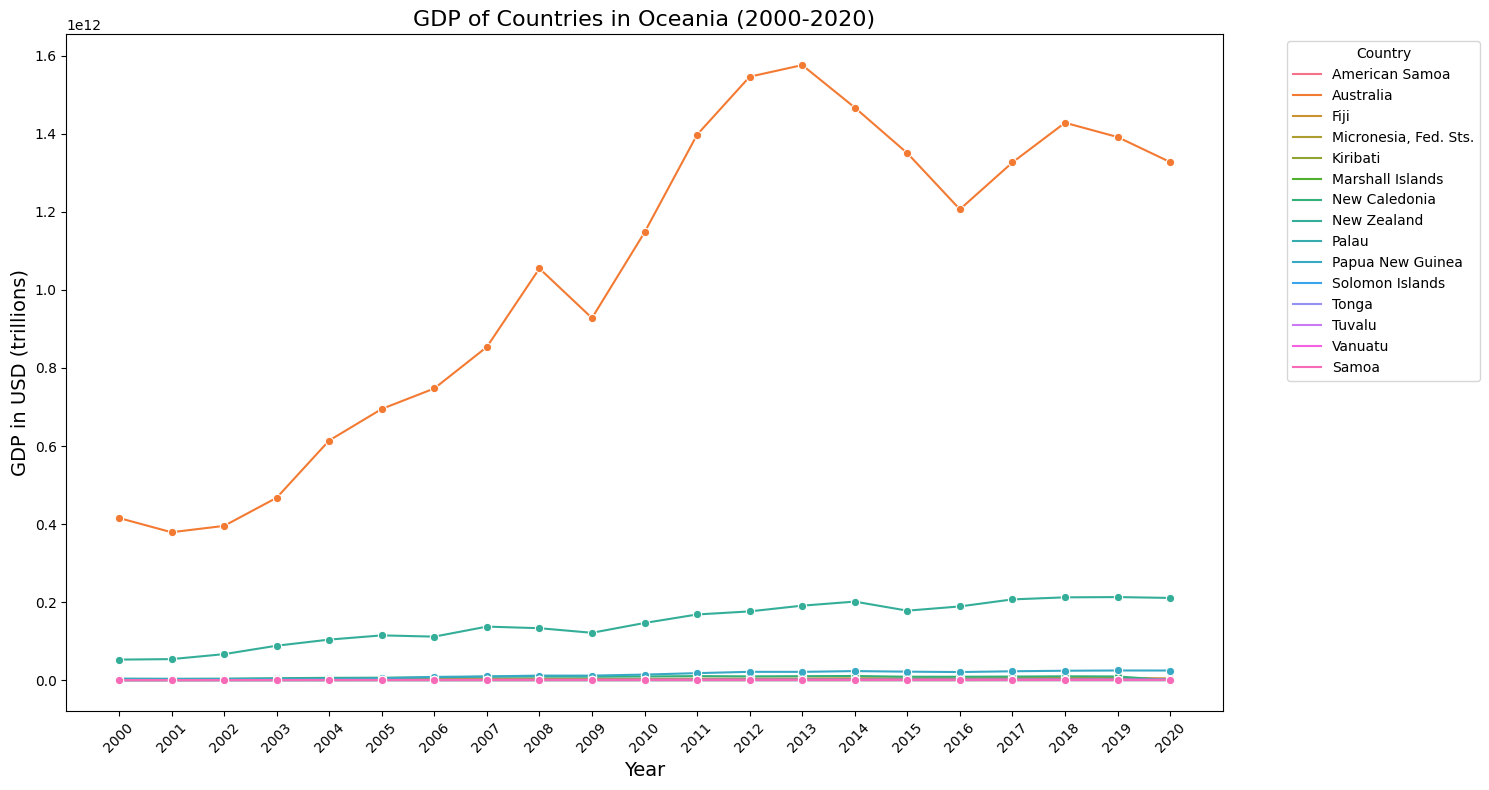

In [71]:
oceania_dc = oceania_dc.fillna(0)  # Or you can use dropna() to remove rows with NaN values

# Set the year columns as index for better plotting
year_columns = [str(year) for year in range(2000, 2021)]
oceania_dc_years = oceania_dc[["Country Name"] + year_columns]

# Reshape the data to have 'Country Name' as one column and years as another
oceania_dc_long = oceania_dc_years.melt(id_vars=["Country Name"], var_name="Year", value_name="GDP")

# Convert GDP to numeric (in case there are non-numeric values like 'NaN')
oceania_dc_long["GDP"] = pd.to_numeric(oceania_dc_long["GDP"], errors='coerce')

# Plot the GDP data for each country over time
plt.figure(figsize=(15, 8))
sns.lineplot(data=oceania_dc_long, x="Year", y="GDP", hue="Country Name", marker="o")


plt.title('GDP of Countries in Oceania (2000-2020)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('GDP  (trillions)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()